In [1]:
# Numpy library to use matrices
import numpy as np
import cv2

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt


In [2]:
# We'll continue onwards with our canvas function
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure(figsize = (8,8))
#     plt.axis('off')
    plt.imshow(canvas) 
    plt.title(title)
    
def reset_canvas(size):
    # Color image
    return np.ones((size,size,3), dtype=np.uint8) * 255


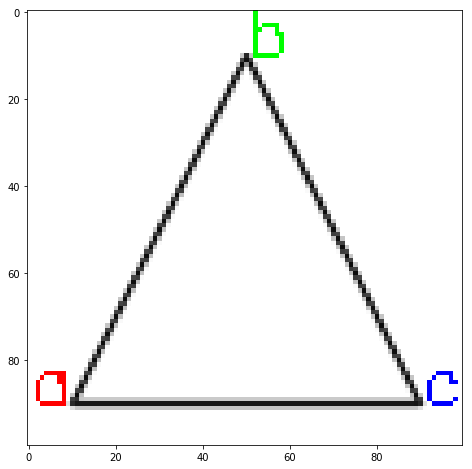

In [3]:
# Draw a triangle


def triangle(canvas, x0, x1, x2):
    X = np.array([[x0, x1, x2, x0]], np.int32)
    for i in range(len(X[0])):
        canvas = cv2.line(canvas, tuple(X[0][i-1]), tuple(X[0][i]), (0,0,0), 1, cv2.LINE_AA)

    font = cv2.FONT_HERSHEY_SIMPLEX
    canvas = cv2.putText(canvas, "a", tuple(x0 - np.array([10,0])), font, 0.5, (255, 0, 0))
    canvas = cv2.putText(canvas, "b", tuple(x1), font, 0.5, (0, 255, 0))
    canvas = cv2.putText(canvas, "c", tuple(x2), font, 0.5, (0, 0, 255))
    return canvas
                         
canvas = reset_canvas(N)                         
x0 = np.array([10, 90])
x1 = np.array([50, 10])
x2 = np.array([90, 90])                         
canvas = triangle(canvas, x0, x1, x2)
show_canvas(canvas)

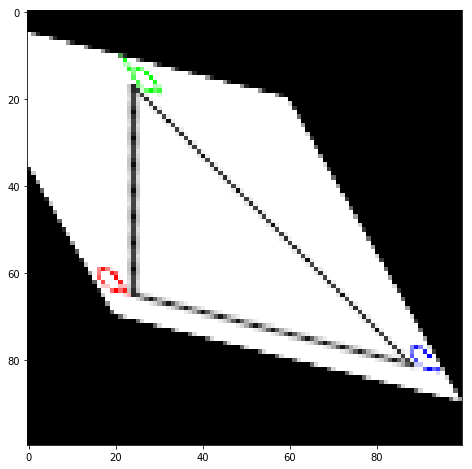

In [17]:
# An open CV way

A = np.array(
    [[0.8, 0.4],
    [0.2, 0.7]]
)
b = np.array([
    [-20],
    [0]
])

new_canvas = canvas.copy()
M = np.concatenate([A, b], axis=1)
new_canvas = cv2.warpAffine(
    new_canvas, M, new_canvas.shape[:2], 
    borderMode=cv2.BORDER_CONSTANT)
show_canvas(new_canvas)

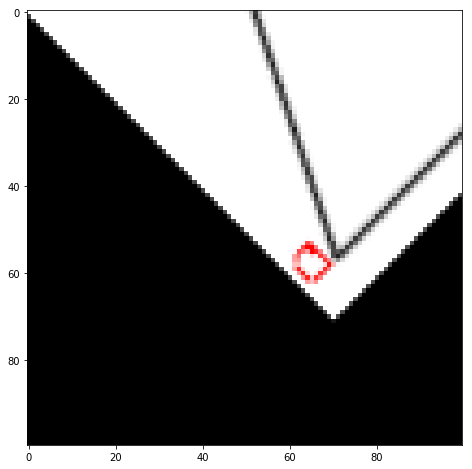

In [16]:
# We'll first try the rotation matrix
new_canvas = canvas.copy()
M1 = np.asarray([
    [np.cos(np.pi/4), np.sin(np.pi/4), 0.0], 
    [-np.sin(np.pi/4), np.cos(np.pi/4), 0.0],
    [0, 0, 1]
])
new_canvas = cv2.warpAffine(
    new_canvas, M1[:2], new_canvas.shape[:2], 
    borderMode=cv2.BORDER_CONSTANT)
show_canvas(new_canvas)

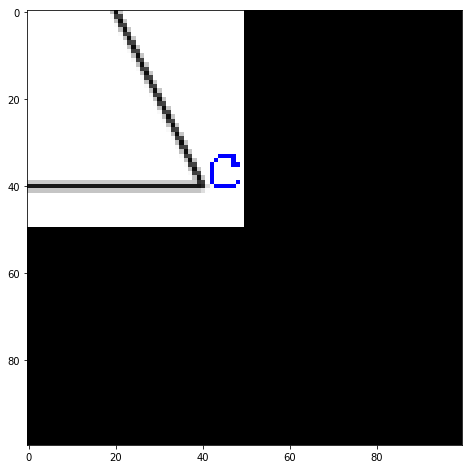

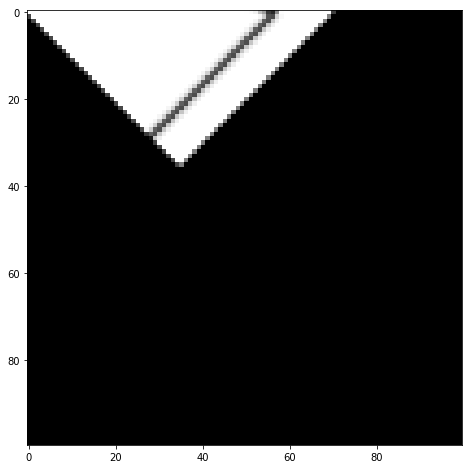

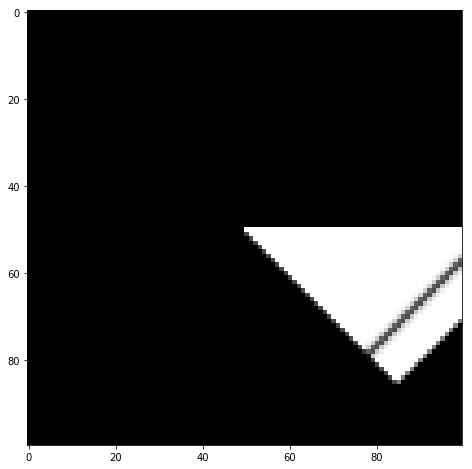

In [19]:
# Well... that's not what we wanted. How do we rotate it about the center?
new_canvas = canvas.copy()
M1 = np.asarray([
    [1, 0, -0.5*N], 
    [0, 1, -0.5*N],
    [0, 0, 1]
])
M2 = np.asarray([
    [np.cos(np.pi/4), np.sin(np.pi/4), 0.0], 
    [-np.sin(np.pi/4), np.cos(np.pi/4), 0.0],
    [0, 0, 1]
])
M3 = np.asarray([
    [1, 0, 0.5*N], 
    [0, 1, 0.5*N],
    [0, 0, 1]
])
new_canvas = cv2.warpAffine(
    new_canvas, M1[:2], new_canvas.shape[:2], 
    borderMode=cv2.BORDER_CONSTANT)
show_canvas(new_canvas)
new_canvas = cv2.warpAffine(
    new_canvas, M2[:2], new_canvas.shape[:2], 
    borderMode=cv2.BORDER_CONSTANT)
show_canvas(new_canvas)
new_canvas = cv2.warpAffine(
    new_canvas, M3[:2], new_canvas.shape[:2], 
    borderMode=cv2.BORDER_CONSTANT)
show_canvas(new_canvas)

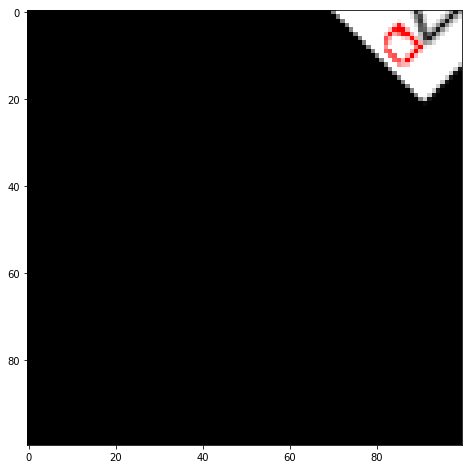

In [20]:
# That did not work!



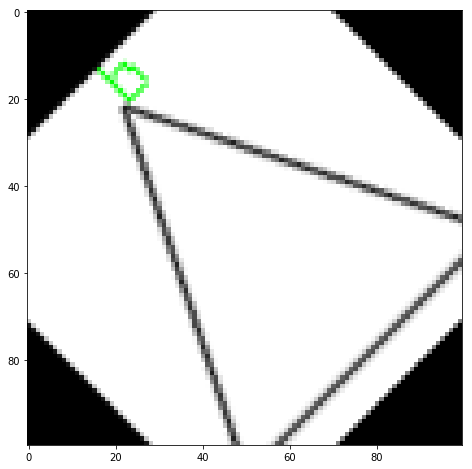

In [21]:
# Huh?
new_canvas = canvas.copy()
M1 = np.asarray([
    [1, 0, -0.5*N], 
    [0, 1, -0.5*N],
    [0, 0, 1]
])
M2 = np.asarray([
    [np.cos(np.pi/4), np.sin(np.pi/4), 0.0], 
    [-np.sin(np.pi/4), np.cos(np.pi/4), 0.0],
    [0, 0, 1]
])
M3 = np.asarray([
    [1, 0, 0.5*N], 
    [0, 1, 0.5*N],
    [0, 0, 1]
])
M = np.matmul(M3, np.matmul(M2, M1))
new_canvas = cv2.warpAffine(
    new_canvas, M[:2], new_canvas.shape[:2], 
    borderMode=cv2.BORDER_CONSTANT)
show_canvas(new_canvas)

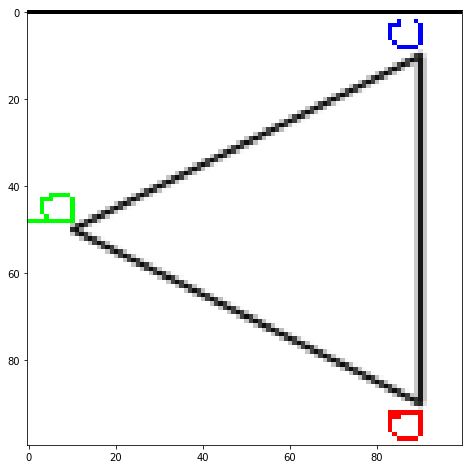

In [22]:
# What if we rotate twice?
new_canvas = canvas.copy()
M1 = np.asarray([
    [1, 0, -0.5*N], 
    [0, 1, -0.5*N],
    [0, 0, 1]
])
M2 = np.asarray([
    [np.cos(np.pi/4), np.sin(np.pi/4), 0.0], 
    [-np.sin(np.pi/4), np.cos(np.pi/4), 0.0],
    [0, 0, 1]
])
M3 = np.asarray([
    [1, 0, 0.5*N], 
    [0, 1, 0.5*N],
    [0, 0, 1]
])
M = np.matmul(M3, np.matmul(M2, np.matmul(M2, M1)))
new_canvas = cv2.warpAffine(
    new_canvas, M[:2], new_canvas.shape[:2], 
    borderMode=cv2.BORDER_CONSTANT)
show_canvas(new_canvas)

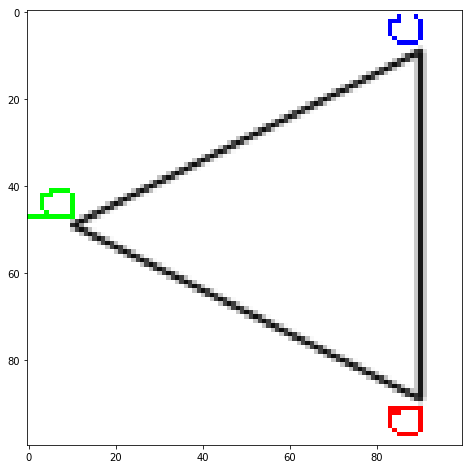

In [23]:
# Oops we have a bug! The center is not the center!
new_canvas = canvas.copy()
M1 = np.asarray([
    [1, 0, -0.5*(N-1)], 
    [0, 1, -0.5*(N-1)],
    [0, 0, 1]
])
M2 = np.asarray([
    [np.cos(np.pi/4), np.sin(np.pi/4), 0.0], 
    [-np.sin(np.pi/4), np.cos(np.pi/4), 0.0],
    [0, 0, 1]
])
M3 = np.asarray([
    [1, 0, 0.5*(N-1)], 
    [0, 1, 0.5*(N-1)],
    [0, 0, 1]
])
M = np.matmul(M3, np.matmul(M2, np.matmul(M2, M1)))
new_canvas = cv2.warpAffine(
    new_canvas, M[:2], new_canvas.shape[:2], 
    borderMode=cv2.BORDER_CONSTANT)
show_canvas(new_canvas)